# Import

In [1]:
import torch
import os
import torchvision
import torchvision.transforms as transforms
from fedn.utils.helpers import get_helper
import numpy as np
from matplotlib import pyplot as plt

from torch.utils.data import DataLoader, TensorDataset

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Function

In [2]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(784, 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 10)

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x.reshape(x.size(0), 784)))
        x = torch.nn.functional.dropout(x, p=0.5, training=self.training)
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.log_softmax(self.fc3(x), dim=1)
        return x


# Load model and params

In [7]:
# Specify params
params = '50_clients_40_rounds/PARAMS/params_50_clients_40_rounds_20%.json'

# Load the saved model state
HELPER_MODULE = 'pytorchhelper'
helper = get_helper(HELPER_MODULE)
weights_np = helper.load(params)
for k in weights_np.keys():
    weights_np[k] = torch.from_numpy(weights_np[k])

model = Net()
model.load_state_dict(weights_np)

# Set the model to evaluation mode
model.eval()

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

# Visualize the first layer

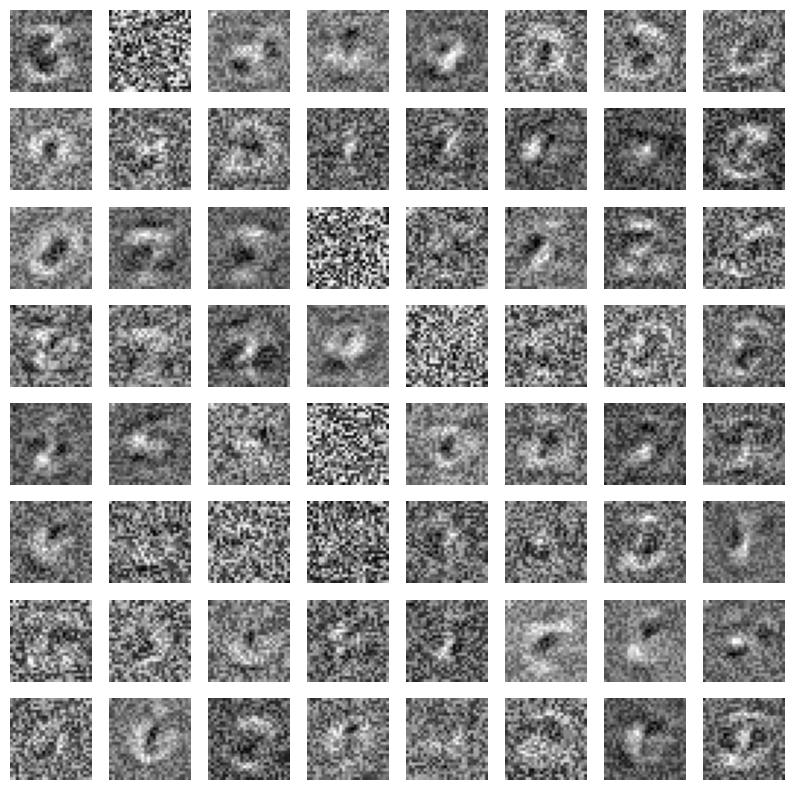

In [8]:
# Extract the weights for the first layer
fc1_weights = model.fc1.weight.data

# Reshape and visualize the weights for each neuron in the first layer
fig, axes = plt.subplots(8, 8, figsize=(10, 10))  # Adjust the subplot grid as needed
for i, ax in enumerate(axes.flat):
    # Reshape the weights of the i-th neuron in fc1 to 28x28
    img = fc1_weights[i].view(28, 28)
    
    ax.imshow(img, cmap='gray')
    ax.axis('off')

plt.show()
